In [4]:
!pip install nltk
!pip install pandas


[notice] A new release of pip available: 22.3.1 -> 23.3.1
[notice] To update, run: pip install --upgrade pip
  Using cached pandas-2.1.3-cp311-cp311-macosx_10_9_x86_64.whl (11.6 MB)
  Using cached numpy-1.26.2-cp311-cp311-macosx_10_9_x86_64.whl (20.6 MB)
  Using cached pytz-2023.3.post1-py2.py3-none-any.whl (502 kB)
  Using cached tzdata-2023.3-py2.py3-none-any.whl (341 kB)

[notice] A new release of pip available: 22.3.1 -> 23.3.1
[notice] To update, run: pip install --upgrade pip


In [80]:
!pip install wordcloud
!pip install -U scikit-learn



[notice] A new release of pip available: 22.3.1 -> 23.3.1
[notice] To update, run: pip install --upgrade pip
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.1/10.1 MB 8.7 MB/s eta 0:00:0000:010:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 37.2/37.2 MB 8.1 MB/s eta 0:00:0000:0100:01

[notice] A new release of pip available: 22.3.1 -> 23.3.1
[notice] To update, run: pip install --upgrade pip


## Preprocessing
- remove all non-alphabetical characters
- lowering the format
- tokenisation
- removing stop words
- stemming/lemmitisation
- spell correction

In [6]:
!pip install autocorrect

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 622.8/622.8 kB 5.8 MB/s eta 0:00:00a 0:00:01
  Preparing metadata (setup.py) ... done
  DEPRECATION: autocorrect is being installed using the legacy 'setup.py install' method, because it does not have a 'pyproject.toml' and the 'wheel' package is not installed. pip 23.1 will enforce this behaviour change. A possible replacement is to enable the '--use-pep517' option. Discussion can be found at https://github.com/pypa/pip/issues/8559
  Running setup.py install for autocorrect ... done

[notice] A new release of pip available: 22.3.1 -> 23.3.1
[notice] To update, run: pip install --upgrade pip


In [78]:
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
import pandas as pd
from autocorrect import Speller
import os
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import re
from tqdm import tqdm
import sklearn

ModuleNotFoundError: No module named 'sklearn'

In [40]:
data = pd.read_csv("spam.csv")

In [41]:
data.head() 

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [42]:
data = data.drop(['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], axis = 1)

In [43]:
data.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [44]:
data = data.rename(columns={'v1':'labels','v2':'messages'})
data.head()


,labels,messages
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


### Visualising Spam Words

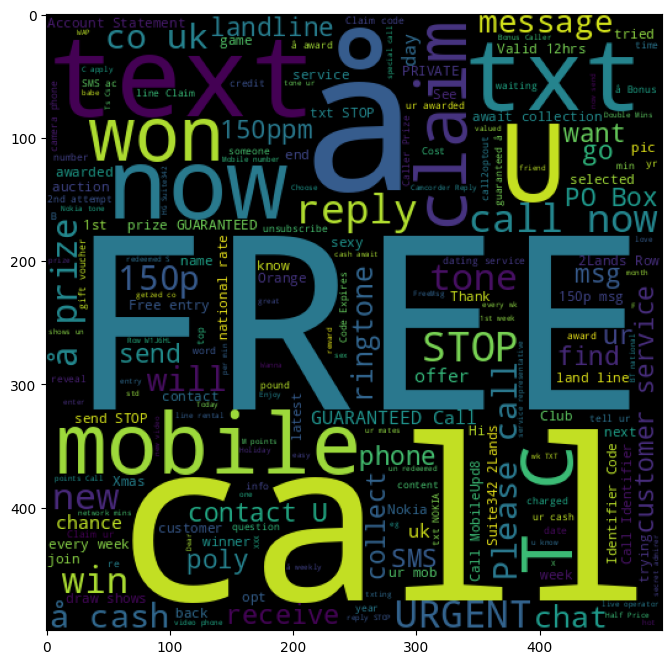

In [52]:
spam_words = ' '.join(list(data[data['labels'] == 'spam']['messages']))
spam_wc = WordCloud(width=500, height=500).generate(spam_words)
plt.figure(figsize=(10,8))
plt.imshow(spam_wc)
plt.show()

### Preprocessing

In [58]:
spell = Speller()
stemmer = PorterStemmer()

In [74]:
data['labels'].apply(lambda x: 1 if x == 'spam' else 0)

0       0
1       0
2       1
3       0
4       0
       ..
5567    1
5568    0
5569    0
5570    0
5571    0
Name: labels, Length: 5572, dtype: int64

In [75]:
new_data = []

for i in tqdm(range(data.shape[0])):
    lines = data.iloc[i,1]
    lines = re.sub('[^A-Za-z]', ' ', lines)
    lines = lines.lower()
    # tokeniseation
    tokenised_lines = word_tokenize(lines)

    # removing stop words, stemming and spell correction
    processed_lines = []

    for i in tokenised_lines:
        if i not in set(stopwords.words('english')):
            processed_lines.append(stemmer.stem(i))

    final_lines = ' '.join(processed_lines)
    new_data.append(final_lines)


100%|██████████| 5572/5572 [00:15<00:00, 353.67it/s]


## Splitting the data into train and test sets

In [76]:
Y = data['labels']

In [81]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(new_data, Y, test_size = 0.2, random_state = 0)

In [83]:
len(X_train), len(X_test)

(4457, 1115)

## Vectorisation using Bag-of-Words

In [85]:
from sklearn.feature_extraction.text import CountVectorizer
# focuses on frequency of occurance of words in documents - does not consider rarity of words
matrix = CountVectorizer()

In [89]:
X_train_vect = matrix.fit_transform(X_train).toarray()
X_test_vect = matrix.transform(X_test).toarray()

## Model Training

In [92]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB
model = GaussianNB()

In [94]:
model.fit(X_train_vect, y_train)

GaussianNB()

In [95]:
model.classes_

array(['ham', 'spam'], dtype='<U4')

In [98]:
y_pred = model.predict(X_test_vect)

In [99]:
from sklearn.metrics import accuracy_score, confusion_matrix

In [101]:
accuracy_score(y_test, y_pred)

0.8645739910313901

In [103]:
confusion_matrix(y_test, y_pred)

array([[822, 127],
       [ 24, 142]])